In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_train.csv')
a=data.to_numpy()
a

array([[    0,     8,     0, ...,     0,     0,     0],
       [    1,     4,     0, ...,     0,     0,     0],
       [    2,     1,     0, ...,     0,     0,     0],
       ...,
       [29997,     9,     0, ...,     0,     0,     0],
       [29998,     4,     0, ...,     0,     0,     0],
       [29999,     6,     0, ...,     0,     0,     0]])

In [ ]:
a.shape

(30000, 786)

In [ ]:
x_t=a[:,range(2,a.shape[1])]
y_t=a[:,1]
x_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_t.shape

(30000, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

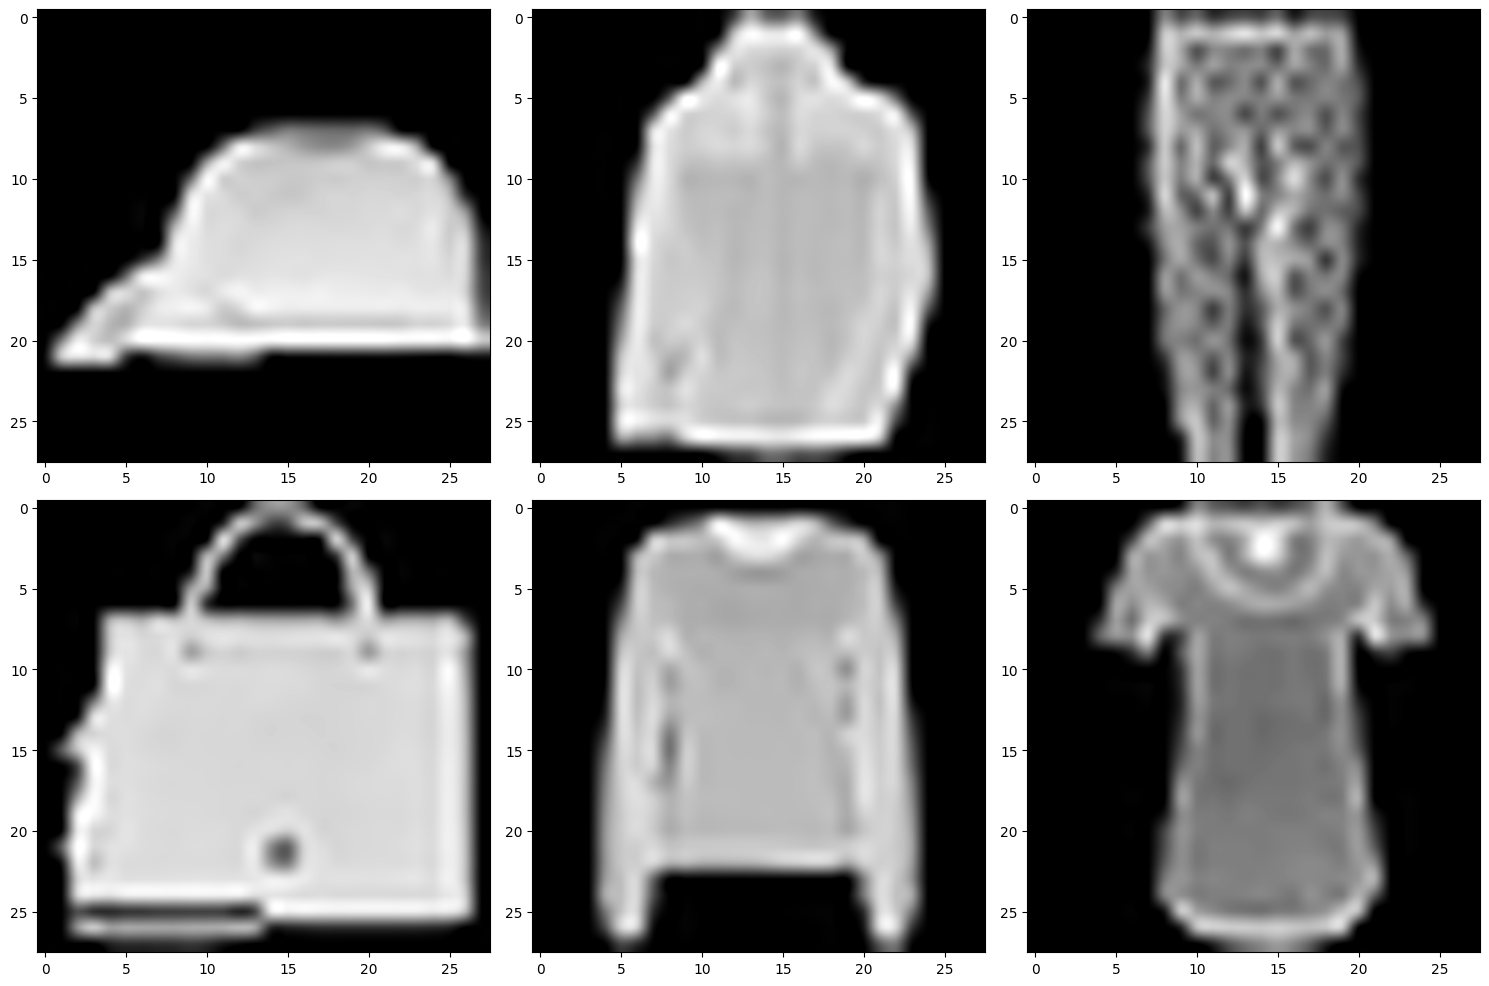

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_t[num].reshape(28,28),cmap='gray',interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

In [ ]:
y_t

array([8, 4, 1, ..., 9, 4, 6])

In [ ]:
y_t.shape

(30000,)

In [ ]:
set(y_t)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
np.max(x_t)

255

In [ ]:
x_train=x_t/np.max(x_t)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_train.shape

(30000, 784)

In [ ]:
def transform(ar):
  op=np.zeros((10,ar.shape[0]))
  for i in range(ar.shape[0]):
    op[ar[i]][i]=1
  return op.T

In [ ]:
y_train=transform(y_t)
print(y_train[range(5),:])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [ ]:
def cross_entropy(y,yhat):
  return -np.sum(np.multiply(y,np.log(yhat+1e-7)))

Number of Iterations        Cost
         50          29633.67657469603
        100          23289.474120619387
        150          20667.014295132343
        200          19122.562916810697
        250          18058.641051786886
        300          17262.13966578162
        350          16638.659797317046
        400          16132.091051404557
        450          15710.865942097356
        500          15353.136578852105


Text(0.5, 0, 'Number of Iterations')

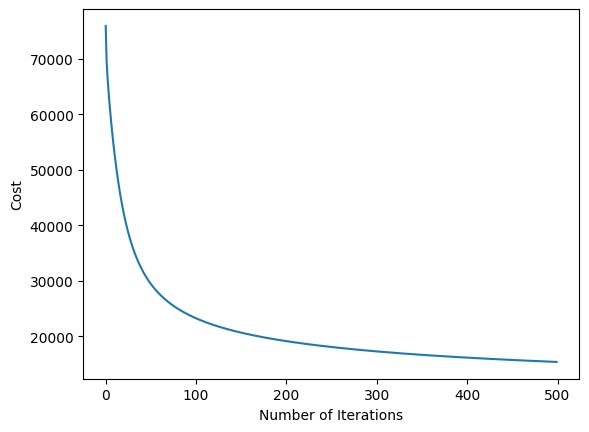

In [ ]:
alpha=0.0000006
j_hist=[]
np.random.seed(42)
w=[]
b=[]
neurons=[x_train.shape[1],1024,512,10]#the first element denotes the number of neurons in the input layer and the last one in the output layer
#the elements in between denote the number of neurons in the ith hidden layers, i being the index of the element
for i in range(1,len(neurons)):
  w.append(np.random.randn(neurons[i-1],neurons[i])*np.sqrt(2/neurons[i-1]))
  b.append(np.zeros(neurons[i]))
print('Number of Iterations        Cost')
for i in range(1,501):
  y_hid=[x_train]
  for j in range(0,len(neurons)-2):
    y_hid.append(np.maximum(0,np.dot(y_hid[j],w[j])+b[j]))
  y_hat=softmax(np.dot(y_hid[-1],w[-1])+b[-1])
  c=cross_entropy(y_train,y_hat)
  j_hist.append(c)
  temp=[y_hat-y_train]
  dj_dw=[]
  dj_db=[]
  for j in range(1,len(neurons)):
    dj_dw.insert(0,np.dot(y_hid[-j].T,temp[-j]))
    dj_db.insert(0,temp[-j].sum(axis=0))
    temp.insert(0,(y_hid[-j]>0)*np.dot(temp[-j],w[-j].T))
  for j in range(len(neurons)-1):
    w[j]-=alpha*dj_dw[j]
    b[j]-=alpha*dj_db[j]
  if(i/50 in range(11)):
    print('%11s'%i,'        ',c)
plt.plot(np.arange(len(j_hist)),j_hist)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

In [ ]:
pred=x_train
for i in range(len(neurons)-2):
  pred=np.maximum(0,np.dot(pred,w[i])+b[i])
pred=np.argmax(softmax(np.dot(pred,w[-1])+b[-1]),axis=1)
pred

array([7, 4, 1, ..., 9, 2, 0])

In [ ]:
np.mean(pred==y_t)*100

83.00333333333333

In [ ]:
new_data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_test.csv')
new_a=new_data.to_numpy()
new_a

array([[25672,     0,     0, ...,     0,     0,     0],
       [59964,     0,     0, ...,     0,     0,     0],
       [66230,     0,     0, ...,     0,     0,     0],
       ...,
       [99226,     0,     0, ...,     0,     1,     0],
       [58519,     0,     1, ...,     0,     0,     0],
       [80458,     0,     0, ...,     0,     0,     0]])

In [ ]:
new_a.shape

(10000, 785)

In [ ]:
x_test=new_a[:,range(1,785)]/np.max(x_t)
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_test=x_test
for i in range(len(neurons)-2):
  y_test=np.maximum(0,np.dot(y_test,w[i])+b[i])
y_test=np.argmax(softmax(np.dot(y_test,w[-1])+b[-1]),axis=1)
y_test

array([0, 1, 2, ..., 8, 6, 2])

In [ ]:
Predictions=new_data.drop(new_data.columns[[i for i in range(1,785)]], axis=1)
Predictions['Predicted']=y_test
Predictions.to_csv('/content/drive/MyDrive/WOC ML Data/NeuralNetwork_Predictions_Re.csv', index=False)